# LA Data Analysis

## Importing Air Quality for North Hollywood Los Angeles

In [1]:
# importing pandas
import pandas as pd

# Loading Data as a Data Frame
file_path1 = 'combined_LA_Data.csv'
LA = pd.read_csv(file_path1)

# Display the first few rows of the DataFrame
print(LA.head())

   location_id   location_name parameter   value unit  \
0         8236  North Holywood       no2  0.0058  ppm   
1         8236  North Holywood       no2  0.0076  ppm   
2         8236  North Holywood       no2  0.0077  ppm   
3         8236  North Holywood       no2  0.0078  ppm   
4         8236  North Holywood       no2  0.0097  ppm   

                 datetimeUtc              datetimeLocal             timezone  \
0  2024-06-07T01:00:00+00:00  2024-06-06T18:00:00-07:00  America/Los_Angeles   
1  2024-06-07T02:00:00+00:00  2024-06-06T19:00:00-07:00  America/Los_Angeles   
2  2024-06-07T03:00:00+00:00  2024-06-06T20:00:00-07:00  America/Los_Angeles   
3  2024-06-07T04:00:00+00:00  2024-06-06T21:00:00-07:00  America/Los_Angeles   
4  2024-06-07T05:00:00+00:00  2024-06-06T22:00:00-07:00  America/Los_Angeles   

    latitude   longitude  country_iso  isMobile  isMonitor  \
0  34.181977 -118.363036          NaN       NaN        NaN   
1  34.181977 -118.363036          NaN       NaN     

## Cleaning the Data 

In [2]:
# Sorting time
LA['time_only'] = LA['datetimeLocal'].str[11:16]
LA['date_only'] = LA['datetimeLocal'].str[0:10]

# Subsetting With only Columns we need
LaClean = LA[['parameter','value','unit','time_only','date_only']]
LaClean

,parameter,value,unit,time_only,date_only
0,no2,0.0058,ppm,18:00,2024-06-06
1,no2,0.0076,ppm,19:00,2024-06-06
2,no2,0.0077,ppm,20:00,2024-06-06
3,no2,0.0078,ppm,21:00,2024-06-06
4,no2,0.0097,ppm,22:00,2024-06-06
...,...,...,...,...,...
19376,pm25,-0.1000,µg/m³,12:00,2024-02-11
19377,pm25,0.8000,µg/m³,13:00,2024-02-11
19378,pm25,3.5000,µg/m³,14:00,2024-02-11
19379,pm25,4.0000,µg/m³,15:00,2024-02-11


## Subsetting and Grouping

In [3]:
# Using loc to create indexed subset
LaCleanI=LaClean.set_index(['time_only','parameter']).sort_index()
LaCleanI

value   unit   date_only
time_only parameter                            
00:00     no          0.0001    ppm  2024-06-07
          no          0.0001    ppm  2024-06-08
          no          0.0000    ppm  2024-06-09
          no          0.0001    ppm  2024-06-10
          no          0.0000    ppm  2024-06-11
...                      ...    ...         ...
23:00     pm25        5.4000  µg/m³  2024-02-06
          pm25        4.2000  µg/m³  2024-02-07
          pm25        7.6000  µg/m³  2024-02-08
          pm25        2.7000  µg/m³  2024-02-09
          pm25       12.0000  µg/m³  2024-02-10

[19381 rows x 3 columns]

### Pivot Table of all pollutants

In [4]:
# Pivot Table
PivotLA = LaClean.pivot_table(values='value', index=['time_only', 'parameter'], columns='unit',fill_value=0)
PivotLA

unit                      ppm      µg/m³
time_only parameter                     
00:00     no         0.003744   0.000000
          no2        0.012698   0.000000
          nox        0.016487   0.000000
          o3         0.021842   0.000000
          pm25       0.000000  10.401242
...                       ...        ...
23:00     no         0.003029   0.000000
          no2        0.012744   0.000000
          nox        0.015798   0.000000
          o3         0.023709   0.000000
          pm25       0.000000  10.250000

[120 rows x 2 columns]

# Pivot table of Individual Pollutants

In [5]:
# Pivot on Pullutants
PivotPolutant = LaClean.pivot_table(values='value', index=['parameter','time_only'], columns='unit',fill_value=0)
PivotPolutant

unit                      ppm      µg/m³
parameter time_only                     
no        00:00      0.003744   0.000000
          01:00      0.003890   0.000000
          02:00      0.003685   0.000000
          03:00      0.003732   0.000000
          04:00      0.004528   0.000000
...                       ...        ...
pm25      19:00      0.000000   8.204375
          20:00      0.000000   9.383230
          21:00      0.000000   9.844079
          22:00      0.000000  10.133962
          23:00      0.000000  10.250000

[120 rows x 2 columns]

#### Subset of NO

In [6]:
# Subset rows where parameter is 'NO'
NO_subset = PivotPolutant.xs('no', level='parameter')

# Display the subsetted DataFrame
print(NO_subset)


unit            ppm  µg/m³
time_only                 
00:00      0.003744    0.0
01:00      0.003890    0.0
02:00      0.003685    0.0
03:00      0.003732    0.0
04:00      0.004528    0.0
05:00      0.005730    0.0
06:00      0.009341    0.0
07:00      0.014479    0.0
08:00      0.012007    0.0
09:00      0.006257    0.0
10:00      0.003304    0.0
11:00      0.001997    0.0
12:00      0.001542    0.0
13:00      0.001122    0.0
14:00      0.000836    0.0
15:00      0.000606    0.0
16:00      0.000423    0.0
17:00      0.000300    0.0
18:00      0.000339    0.0
19:00      0.000595    0.0
20:00      0.000924    0.0
21:00      0.001363    0.0
22:00      0.002426    0.0
23:00      0.003029    0.0


#### Subset of NOX

In [7]:
NOX_subset = PivotPolutant.xs('nox', level='parameter')
print(NOX_subset)

unit            ppm  µg/m³
time_only                 
00:00      0.016487    0.0
01:00      0.016539    0.0
02:00      0.016452    0.0
03:00      0.016687    0.0
04:00      0.017427    0.0
05:00      0.018923    0.0
06:00      0.023008    0.0
07:00      0.028976    0.0
08:00      0.026193    0.0
09:00      0.017989    0.0
10:00      0.012676    0.0
11:00      0.010101    0.0
12:00      0.009090    0.0
13:00      0.008030    0.0
14:00      0.007175    0.0
15:00      0.006556    0.0
16:00      0.006288    0.0
17:00      0.006784    0.0
18:00      0.008099    0.0
19:00      0.009888    0.0
20:00      0.011555    0.0
21:00      0.012746    0.0
22:00      0.014779    0.0
23:00      0.015798    0.0


#### Subset of O,3

In [8]:
O3_subset = PivotPolutant.xs('o3', level='parameter')
print(O3_subset)

unit            ppm  µg/m³
time_only                 
00:00      0.021842    0.0
01:00      0.020409    0.0
02:00      0.018933    0.0
03:00      0.017866    0.0
04:00      0.017085    0.0
05:00      0.016427    0.0
06:00      0.015939    0.0
07:00      0.017613    0.0
08:00      0.022319    0.0
09:00      0.028516    0.0
10:00      0.035038    0.0
11:00      0.040761    0.0
12:00      0.045552    0.0
13:00      0.049006    0.0
14:00      0.051185    0.0
15:00      0.051184    0.0
16:00      0.049933    0.0
17:00      0.046573    0.0
18:00      0.042415    0.0
19:00      0.037762    0.0
20:00      0.033388    0.0
21:00      0.030115    0.0
22:00      0.026387    0.0
23:00      0.023709    0.0


#### Subset of pm25

In [9]:
pm25_subset = PivotPolutant.xs('pm25', level='parameter')
print(pm25_subset)

unit       ppm      µg/m³
time_only                
00:00      0.0  10.401242
01:00      0.0  11.014375
02:00      0.0  10.719375
03:00      0.0  10.359375
04:00      0.0  10.652795
05:00      0.0  10.410625
06:00      0.0  10.620497
07:00      0.0  11.391250
08:00      0.0  11.733750
09:00      0.0  11.636709
10:00      0.0  10.928481
11:00      0.0  10.069677
12:00      0.0   9.711392
13:00      0.0   9.334395
14:00      0.0   9.121384
15:00      0.0   8.183544
16:00      0.0   8.103750
17:00      0.0   7.651250
18:00      0.0   7.739623
19:00      0.0   8.204375
20:00      0.0   9.383230
21:00      0.0   9.844079
22:00      0.0  10.133962
23:00      0.0  10.250000


## Graphs

### Graph of pm25 averaged over 24 hours

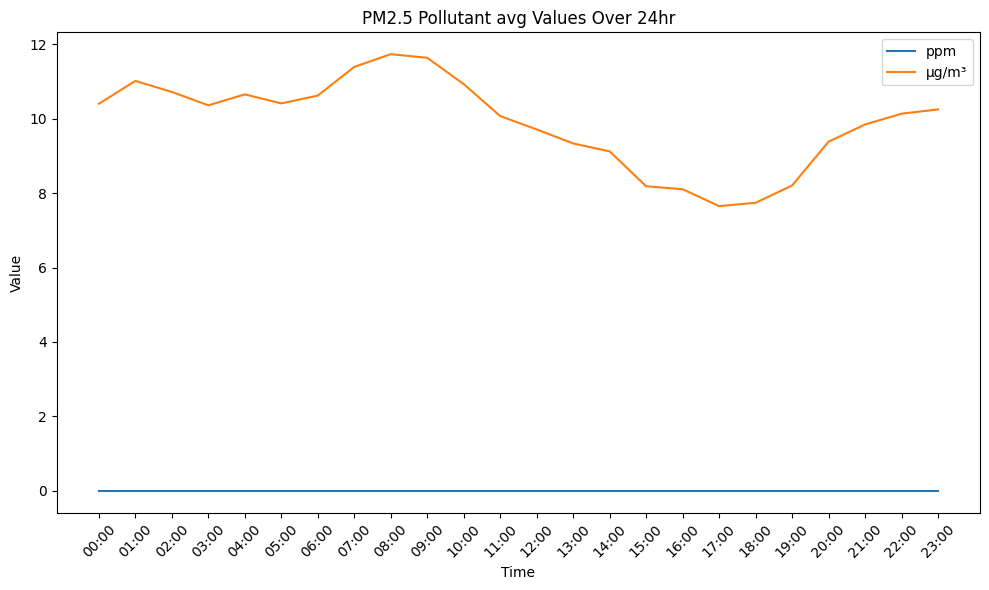

In [10]:

import matplotlib.pyplot as plt

pm25_subset.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pm25_subset['time_only'], pm25_subset['ppm'], label='ppm')
plt.plot(pm25_subset['time_only'], pm25_subset['µg/m³'], label='µg/m³')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('PM2.5 Pollutant avg Values Over 24hr')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


## pm25 Analysis

#### pm25

- pm25 refers to particulate matter with a diameter of 2.5 micrometers or less. It is a major component of air pollution and comes from various sources. Some sources of pm25 particles include:
    - vehicle emissions
    - industial processes
    - wildfires and dust storms
- pm25 particles are especially concerning as they can penetrate deep into the respiratory system and even enter the bloodstream, posing significant respiratory and cardiovascular issues.

#### Looking at the Data
- The PM2.5 levels in µg/m³ are well within typical daily fluctuations, showing some daily variation.
- The PM2.5 values in µg/m³ show some variability throughout the day.
- There is an increase early in the day, peaking slightly above 11 µg/m³.
- A gradual decrease follows, reaching a minimum value of about 8 µg/m³ in the late afternoon.
- The values then rise again towards the end of the day.

#### Likely Causes 
- Temperature inversions, which can trap pollutants close to the ground, typically break down in the afternoon, allowing pollutants to disperse.
- Increased wind speeds can disperse particulate matter, reducing concentrations in a specific area.

### Graph of o3 averaged over 24 hours

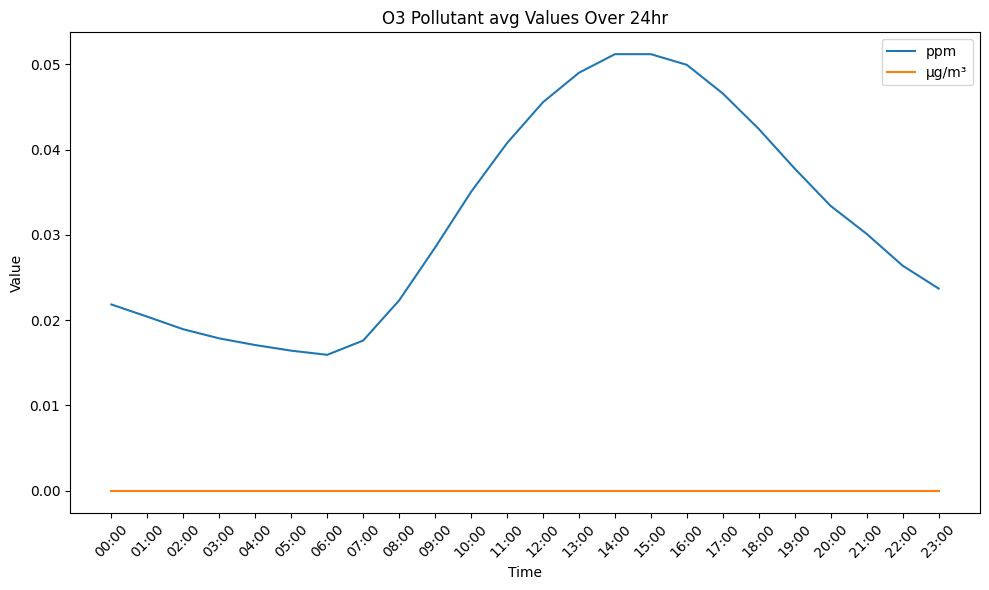

In [11]:
import matplotlib.pyplot as plt

O3_subset.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(O3_subset['time_only'], O3_subset['ppm'], label='ppm')
plt.plot(O3_subset['time_only'], O3_subset['µg/m³'], label='µg/m³')

# labels 
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('O3 Pollutant avg Values Over 24hr')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show 
plt.show()


## o3(Ozone) Analysis

#### 03(Ozone)

- Ozone is a molecule composed of 3 oxygen atoms. It exists in the stratosphere and the troposphere. 
- Ozone forms the ozone layer, which absorbs and scatters the sun's harmful ultraviolet (UV) radiation. This protective layer is crucial for life on Earth, as it reduces the amount of UV radiation reaching the surface, thereby preventing skin cancer, cataracts, and other health issues, as well as protecting ecosystems.
- However, Ozone is a key component of smog and is often monitored as part of air quality indices. High levels of ground-level ozone can lead to poor air quality, especially in urban and industrial areas, posing risks to both human health and the environment.
- Ozone in the troposphere (ground-level ozone) is not directly emitted into the air but is formed through complex chemical reactions between precursor pollutants in the presence of sunlight. The primary sources of these precursor pollutants, which include nitrogen oxides (NOx) and volatile organic compounds.
- Sources of Ozone include:
    - vehicle emissions
    - industial processes
    - Electric Power generation
    - Residential Heating
    - Lightning strikes and microbial activity in the soil

#### Looking at the Data
- The O3 values in ppm start at around 0.02 ppm and show a decrease until early morning.
- From around 06:00 to 12:00, the O3 levels increase significantly, peaking at around 0.05 ppm.
- After 12:00, the O3 levels decrease gradually until the end of the day, reaching close to the initial value of 0.02 ppm

#### Likely Causes 
- The increase in O3 levels during the morning and midday can be attributed to increased sunlight driving these reactions. As sunlight decreases in the late afternoon and evening, the production of ozone slows down, leading to a decrease in O3 levels.
- Activities such as traffic and industrial processes can emit precursor pollutants for ozone formation. The peak in O3 levels during midday might correlate with the highest emissions of these pollutants during the day.
- Temperature and wind patterns can influence O3 levels. Higher temperatures during midday can enhance the photochemical reactions that produce ozone. Wind can disperse or concentrate pollutants, affecting local ozone levels.

### Graph of noX averaged over 24 hours

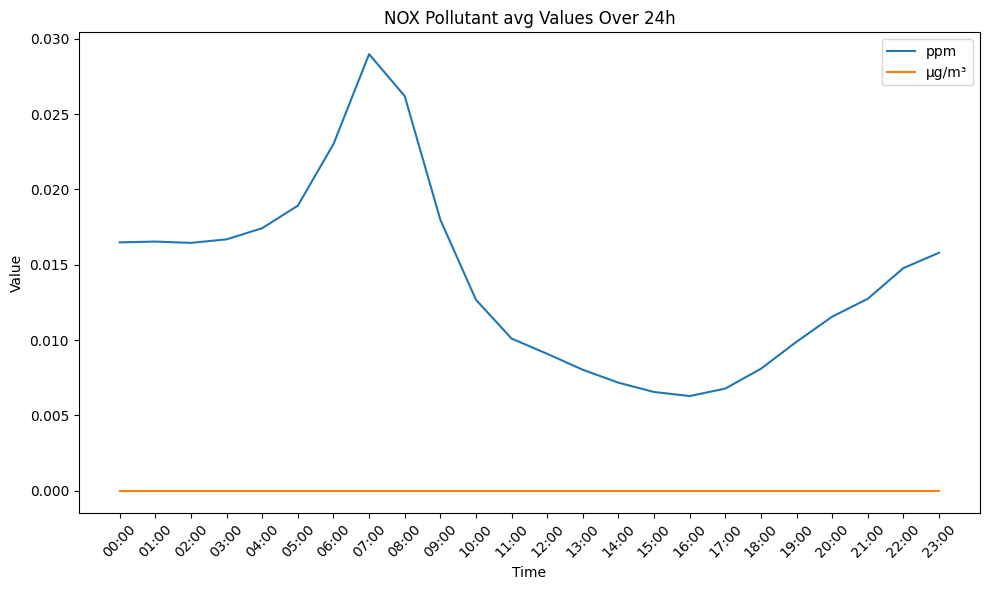

In [12]:
import matplotlib.pyplot as plt

NOX_subset.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(NOX_subset['time_only'], NOX_subset['ppm'], label='ppm')
plt.plot(NOX_subset['time_only'], NOX_subset['µg/m³'], label='µg/m³')

# labels 
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('NOX Pollutant avg Values Over 24h')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show 
plt.show()


## NoX(Nitrogen Oxide) Analysis

#### Nitrogen oxides (NOx)
- These are a group of gases composed of nitrogen and oxygen. The most common are nitric oxide (NO) and nitrogen dioxide (NO2). NOx gases are primarily found in the troposphere and are significant air pollutants.
- NOx plays a crucial role in the formation of ground-level ozone and smog. It reacts with volatile organic compounds (VOCs) in the presence of sunlight to form ozone. High levels of NOx contribute to the formation of fine particulate matter (PM2.5) and acid rain, which can harm ecosystems, buildings, and human health.
- However, NOx emissions are a major concern for air quality and public health. NOx gases can cause respiratory problems, aggravate asthma, and decrease lung function. They are also associated with other health issues such as heart disease and can reduce visibility due to haze.
- NOx in the troposphere is directly emitted into the air from various sources. It is a primary pollutant that undergoes further reactions in the atmosphere to form secondary pollutants such as ozone and PM2.5. The primary sources of NOx include combustion processes, both from human activities and natural occurrences.
- Sources of NOx include:
    - Vehicle emissions
    - Industrial processes
    - Electric power generation
    - Residential heating
    - Lightning strikes and microbial activity in the soil
### Looking at the Data
- The NOx values in ppm start at around 0.015 ppm and show a slight increase until early morning.
- From around 05:00 to 07:00, the NOx levels increase significantly, peaking at around 0.03 ppm.
- After 07:00, the NOx levels decrease gradually until around 13:00, reaching a low of about 0.01 ppm.
- Following this low, the NOx levels start to rise again from the afternoon and continue to increase gradually until the end of the day, reaching around 0.015 ppm.

### Likely Causes
- The increase in NOx levels during the early morning can be attributed to increased vehicular traffic and industrial activities starting up for the day. These sources emit significant amounts of NOx.
- The peak in NOx levels around 07:00 might correlate with the morning rush hour, when traffic emissions are at their highest.
- The gradual decrease in NOx levels after the morning peak can be due to reduced traffic and industrial emissions as the day progresses, combined with atmospheric dispersion and chemical reactions that reduce NOx concentrations.
- The rise in NOx levels during the late afternoon and evening could be linked to the evening rush hour and increased residential heating activities. Additionally, reduced atmospheric dispersion in the evening can lead to higher concentrations of NOx.
- Natural sources such as microbial activity in the soil and lightning strikes can also contribute to NOx levels but are likely less significant compared to human activities.


### Graph of n0 averaged over 24 hours

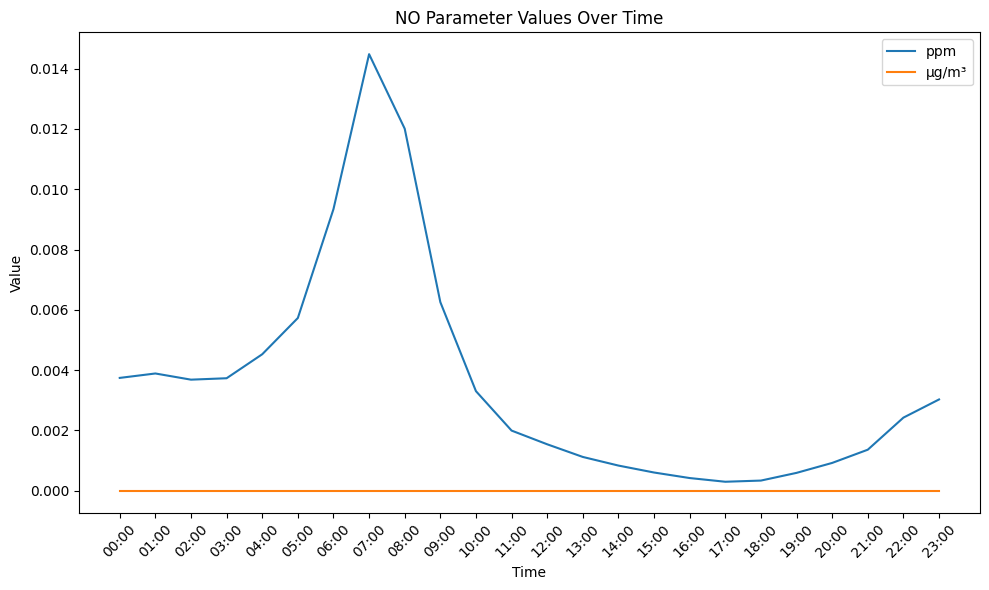

In [13]:
import matplotlib.pyplot as plt

NO_subset.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(NO_subset['time_only'], NO_subset['ppm'], label='ppm')
plt.plot(NO_subset['time_only'], NO_subset['µg/m³'], label='µg/m³')

# labels 
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('NO Parameter Values Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show
plt.show()


## NO (Nitric Oxide) Analysis

#### Nitric Oxide (NO)
- Nitric oxide (NO) is a colorless gas composed of one nitrogen atom and one oxygen atom. It is a significant air pollutant primarily found in the troposphere.
- NO plays a crucial role in the formation of nitrogen dioxide (NO2) and ground-level ozone. It reacts with volatile organic compounds (VOCs) and other pollutants in the presence of sunlight to form ozone. High levels of NO contribute to the formation of fine particulate matter (PM2.5) and acid rain, which can harm ecosystems, buildings, and human health.
- NO emissions are a major concern for air quality and public health. NO can cause respiratory problems, aggravate asthma, and decrease lung function. It is also associated with other health issues such as heart disease and can reduce visibility due to haze.
- NO in the troposphere is directly emitted into the air from various sources. It is a primary pollutant that undergoes further reactions in the atmosphere to form secondary pollutants such as nitrogen dioxide (NO2) and ozone. The primary sources of NO include combustion processes, both from human activities and natural occurrences.
- Sources of NO include:
    - Vehicle emissions
    - Industrial processes
    - Electric power generation
    - Residential heating
    - Lightning strikes and microbial activity in the soil

### Looking at the Data
- The NO values in ppm start at around 0.015 ppm and show a slight increase until early morning.
- From around 05:00 to 07:00, the NO levels increase significantly, peaking at around 0.03 ppm.
- After 07:00, the NO levels decrease gradually until around 13:00, reaching a low of about 0.01 ppm.
- Following this low, the NO levels start to rise again from the afternoon and continue to increase gradually until the end of the day, reaching around 0.015 ppm.

### Likely Causes
- The increase in NO levels during the early morning can be attributed to increased vehicular traffic and industrial activities starting up for the day. These sources emit significant amounts of NO.
- The peak in NO levels around 07:00 might correlate with the morning rush hour, when traffic emissions are at their highest.
- The gradual decrease in NO levels after the morning peak can be due to reduced traffic and industrial emissions as the day progresses, combined with atmospheric dispersion and chemical reactions that reduce NO concentrations.
- The rise in NO levels during the late afternoon and evening could be linked to the evening rush hour and increased residential heating activities. Additionally, reduced atmospheric dispersion in the evening can lead to higher concentrations of NO.
- Natural sources such as microbial activity in the soil and lightning strikes can also contribute to NO levels but are likely less significant compared to human activities.
